# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
from collections import Counter 
# Import API key
from api_keys import weather_api_key
import json

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = "&appid=" + weather_api_key
city_key = "&q=" 
units = "&units=imperial"

query_url = (f'{url}&appid={weather_api_key}{units}&q=')

city_list = []
country_list = []
lat_list = []
lon_list = []
temp_list = []
temp_max_list = []
clouds_list = []
humidity_list = []
wind_speed_list = []
date_time_list = []
counter = 0


for city in cities:
    response = requests.get(query_url + city).json()
    counter = counter + 1
    try:
        city_list.append(response['name'])
        country_list.append(response['sys']['country'])
        lat_list.append(response['coord']['lat'])
        lon_list.append(response['coord']['lon'])
        temp_list.append(response['main']['temp'])
        temp_max_list.append(response['main']['temp_max'])
        clouds_list.append(response['clouds']['all'])
        humidity_list.append(response['main']['humidity'])
        wind_speed_list.append(response['wind']['speed'])  
        date_time_list.append(response['dt'])
                                                      
        print(str(counter) + ' - ' +  city + " has been processed!")
        time.sleep(1)
    except:            
        print(city + " data not found")
        
        
    
    

1 - busselton has been processed!
2 - parry sound has been processed!
3 - provideniya has been processed!
4 - ponta do sol has been processed!
5 - seymchan has been processed!
6 - hobart has been processed!
7 - morehead has been processed!
8 - albany has been processed!
9 - georgetown has been processed!
10 - hilo has been processed!
11 - araxa has been processed!
12 - pisco has been processed!
13 - oktyabrskiy has been processed!
14 - castro has been processed!
15 - warmbad has been processed!
16 - torbay has been processed!
17 - butaritari has been processed!
amderma data not found
19 - leningradskiy has been processed!
20 - mataura has been processed!
21 - fort nelson has been processed!
22 - harindanga has been processed!
23 - new norfolk has been processed!
24 - lebu has been processed!
25 - santa rosa has been processed!
26 - clyde river has been processed!
27 - hope has been processed!
28 - batagay-alyta has been processed!
29 - harper has been processed!
30 - the pas has been p

239 - ornskoldsvik has been processed!
240 - cabo san lucas has been processed!
wa data not found
242 - progreso has been processed!
243 - oulu has been processed!
244 - jalu has been processed!
245 - bud has been processed!
246 - marystown has been processed!
247 - kasongo-lunda has been processed!
248 - kondinskoye has been processed!
249 - beyneu has been processed!
250 - capiibary has been processed!
251 - imbituba has been processed!
252 - north bend has been processed!
253 - codrington has been processed!
254 - ilabaya has been processed!
255 - moose factory has been processed!
256 - cayenne has been processed!
257 - sao gabriel da cachoeira has been processed!
258 - lagoa has been processed!
259 - tommot has been processed!
260 - victoria has been processed!
261 - bata has been processed!
262 - harrismith has been processed!
jiddah data not found
264 - saint-joseph has been processed!
265 - biryusinsk has been processed!
266 - gravdal has been processed!
267 - juneau has been pr

479 - moundsville has been processed!
480 - yulara has been processed!
481 - staryy merchyk has been processed!
482 - rawson has been processed!
483 - sarkand has been processed!
484 - mattru has been processed!
485 - vestmannaeyjar has been processed!
saleaula data not found
487 - auki has been processed!
488 - tshikapa has been processed!
489 - chitungwiza has been processed!
490 - khandyga has been processed!
491 - xiamen has been processed!
492 - meiganga has been processed!
493 - ippy has been processed!
494 - tura has been processed!
495 - shache has been processed!
496 - wamba has been processed!
497 - dwarka has been processed!
498 - santa ana has been processed!
499 - hamilton has been processed!
500 - antalya has been processed!
501 - guiren has been processed!
502 - mercedes has been processed!
503 - nalut has been processed!
504 - fort-shevchenko has been processed!
505 - sladkovo has been processed!
506 - olga has been processed!
507 - marale has been processed!
508 - rasu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Runs ** HOLD **

In [4]:
city_weather_df = pd.DataFrame({
    "City": city_list,
    "Country":country_list,
    "Latitude": lat_list,
    "Longitude": lon_list,
    "Temperature": temp_list,
    "Max Temperature": temp_max_list,
    "Cloudiness": clouds_list,
    "Humidity": humidity_list,
    "Wind Speed": wind_speed_list,
    "Date/Time": date_time_list
})

city_weather_df

,City,Country,Latitude,Longitude,Temperature,Max Temperature,Cloudiness,Humidity,Wind Speed,Date/Time
0,Busselton,AU,-33.6500,115.3333,62.76,64.99,0,78,3.00,1612047319
1,Parry Sound,CA,45.3501,-80.0330,17.60,17.60,33,62,4.47,1612047240
2,Provideniya,RU,64.3833,-173.3000,-12.08,-12.08,84,83,11.72,1612047388
3,Ponta do Sol,PT,32.6667,-17.1000,55.69,60.01,52,76,1.99,1612047326
4,Seymchan,RU,62.8833,152.4333,-29.45,-29.45,100,81,7.85,1612047464
...,...,...,...,...,...,...,...,...,...,...
558,Kadoma,JP,34.7333,135.5833,37.40,41.00,40,81,2.30,1612048098
559,Benguela,AO,-12.5763,13.4055,77.05,77.05,90,77,5.10,1612047906
560,Brae,GB,60.3964,-1.3530,37.40,37.40,75,87,11.50,1612048101
561,Soyo,AO,-6.1349,12.3689,79.90,79.90,100,84,9.84,1612048102


In [5]:
city_weather_df.to_csv("city_weather.csv", encoding="utf-8", index=True)

In [6]:
hum_list = city_weather_df["Humidity"]

for humidity in hum_list:
    if humidity > 100:
        print(humidity)
        
# or can search "Humidity" for value over 100
# humm_list = city_weather_df[city_weather_df["Humidity"]>100].index
# humm_list


## Inspect the data and remove the cities where the humidity > 100%.
----
N/A

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 0, 'Temperature (F)')

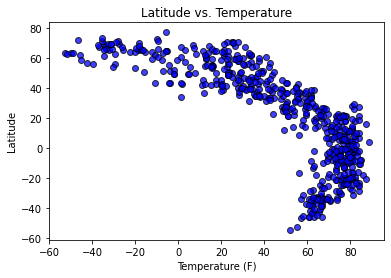

In [93]:
y_axis = lat_list
x_axis = temp_list

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

plt.title('Latitude vs. Temperature')
plt.ylabel('Latitude')
plt.xlabel('Temperature (F)')


## Latitude vs. Humidity Plot

Text(0.5, 0, 'Humidity')

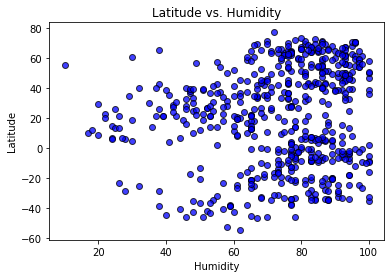

In [94]:
y_axis = lat_list
x_axis = humidity_list


plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

plt.title('Latitude vs. Humidity')
plt.ylabel('Latitude')
plt.xlabel('Humidity')

## Latitude vs. Cloudiness Plot

Text(0.5, 0, 'Cloudiness')

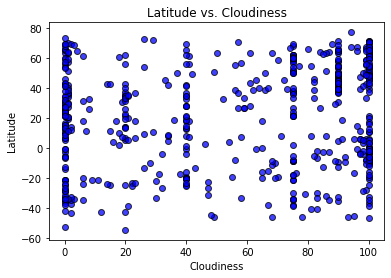

In [95]:
y_axis = lat_list
x_axis = clouds_list

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

plt.title('Latitude vs. Cloudiness')
plt.ylabel('Latitude')
plt.xlabel('Cloudiness')

## Latitude vs. Wind Speed Plot

Text(0.5, 0, 'Wind Speed (mph)')

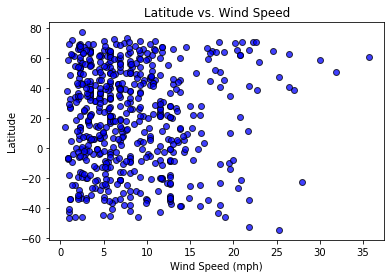

In [96]:
y_axis = lat_list
x_axis = wind_speed_list

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

plt.title('Latitude vs. Wind Speed')
plt.ylabel('Latitude')
plt.xlabel('Wind Speed (mph)')

## Linear Regression

In [14]:
# use list comprehension to find north and south latitudes.  
north_lats = [n_lat for n_lat in lat_list if n_lat >= 0]
south_lats = [lat for lat in lat_list if lat < 0]


In [97]:
#create two new data frames, one for northern latitudes and one for southern latitudes
north_hem_df = pd.DataFrame({
    "Latitude": north_lats
})

south_hem_df = pd.DataFrame({
    "Latitude": south_lats
})

#merge the original city_weather data frame into the two new data frames to bring over needed information.
merged_north_hem_df = pd.merge(north_hem_df, city_weather_df, how="left", on=["Latitude"])
merged_south_hem_df = pd.merge(south_hem_df, city_weather_df, how="left", on=["Latitude"])

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.51x +57.77
The r-value is: 0.7350980398760055


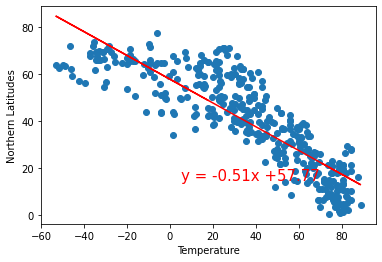

In [98]:
x_values = merged_north_hem_df['Max Temperature']
y_values = merged_north_hem_df['Latitude']
plt.scatter(x_values,y_values)
plt.xlabel('Temperature')
plt.ylabel('Northern Latitudes')


#use scipy, scipy.stats, and linregress modules to determine xy + b
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(5,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 1.07x +-99.09
The r-value is: 0.37382260108775783


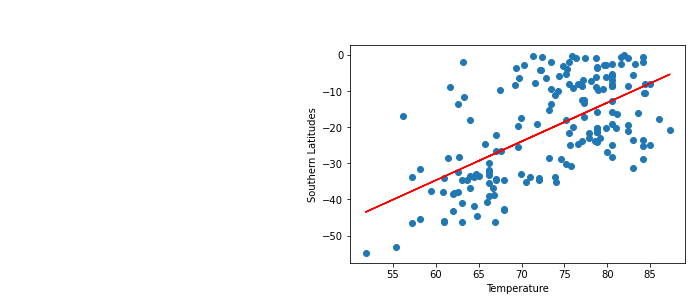

In [99]:
x_values = merged_south_hem_df['Max Temperature']
y_values = merged_south_hem_df['Latitude']
plt.scatter(x_values,y_values)
plt.xlabel('Temperature')
plt.ylabel('Southern Latitudes')

#use scipy, scipy.stats, and linregress modules to determine xy + b
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10, 10),fontsize=15,color="red")


# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.4x +10.54
The r-value is: 0.14077154593770735


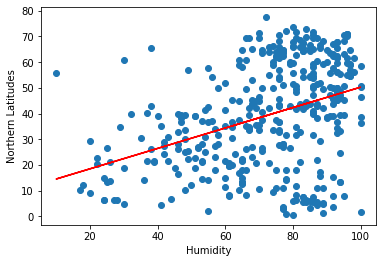

In [62]:
x_values = merged_north_hem_df['Humidity']
y_values = merged_north_hem_df['Latitude']
plt.scatter(x_values, y_values)
plt.xlabel('Humidity')
plt.ylabel('Northern Latitudes')
           
#use scipy, scipy.stats, and linregress modules to determine xy + b
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)


plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation

plt.annotate(line_eq,(5,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.38x +-49.55
The r-value is: 0.18800700715330118


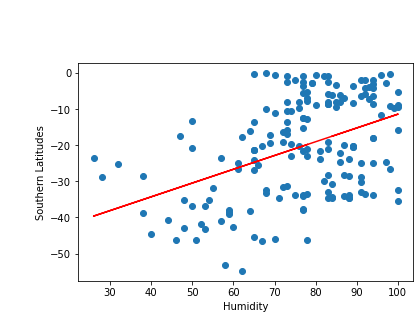

In [63]:
x_values = merged_south_hem_df['Humidity']
y_values = merged_south_hem_df['Latitude']
plt.scatter(x_values,y_values)
plt.xlabel('Humidity')
plt.ylabel('Southern Latitudes')

#use scipy, scipy.stats, and linregress modules to determine xy + b
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)


plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.16x +30.99
The r-value is: 0.08971919622166


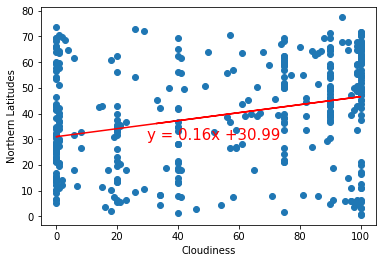

In [74]:
x_values = merged_north_hem_df['Cloudiness']
y_values = merged_north_hem_df['Latitude']
plt.scatter(x_values, y_values)
plt.xlabel('Cloudiness')
plt.ylabel('Northern Latitudes')
           
#use scipy, scipy.stats, and linregress modules to determine xy + b    
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)


plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation

plt.annotate(line_eq,(30,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.12x +-27.48
The r-value is: 0.11907054729404419


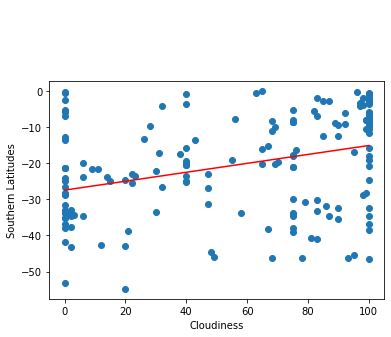

In [91]:
x_values = merged_south_hem_df['Cloudiness']
y_values = merged_south_hem_df['Latitude']
plt.scatter(x_values, y_values)
plt.xlabel('Cloudiness')
plt.ylabel('Southern Latitudes')
           
#use scipy, scipy.stats, and linregress modules to determine xy + b   
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)


plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation

plt.annotate(line_eq,(5, 20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.26x +37.28
The r-value is: 0.00529022089654315


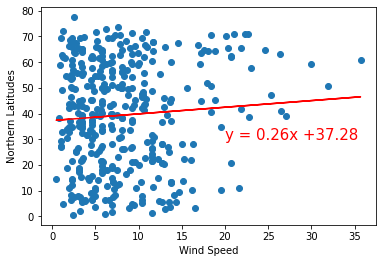

In [81]:
x_values = merged_north_hem_df['Wind Speed']
y_values = merged_north_hem_df['Latitude']
plt.scatter(x_values,y_values)
plt.xlabel('Wind Speed')
plt.ylabel('Northern Latitudes')

#use scipy, scipy.stats, and linregress modules to determine xy + b
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(20,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.35x +-17.68
The r-value is: 0.01979419166411136


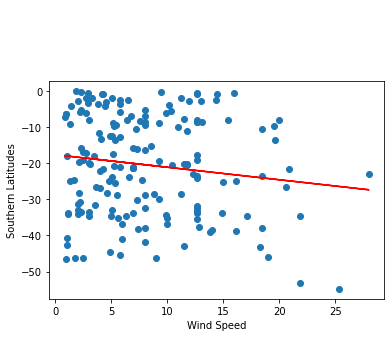

In [90]:
x_values = merged_south_hem_df['Wind Speed']
y_values = merged_south_hem_df['Latitude']
plt.scatter(x_values, y_values)
plt.xlabel('Wind Speed')
plt.ylabel('Southern Latitudes')
           
#use scipy, scipy.stats, and linregress modules to determine xy + b    
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)


plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation

plt.annotate(line_eq,(5, 20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()